In [222]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paytm-revenue-users-transactions/Paytm.csv


# ****Checking columns

In [223]:
df = pd.read_csv('/kaggle/input/paytm-revenue-users-transactions/Paytm.csv')
df.head(10)

,Date,Gross Merchandise Value,Merchant Transactions,Total Transactions,Average Monthly Transacting Users (MTU),Registered Merchants (end of period),"Payment Devices (cumulative, end of period)",Volume of loans distributed,Postpaid Loans,Personal Loans,...,Value of loans distributed,Postpaid Loans.1,Personal Loans.1,Merchant Loans.1,Payments Services to Consumers,Payments Services to Merchants,Other Operating Revenue,Total Payments Revenue,Payment processing charges,Net Payments Margin
0,01-06-2020,0.70,969,1231,39.7,17.0,0.0,23,20,0,...,44,19,1,23,NaN,NaN,NaN,NaN,NaN,NaN
1,01-09-2020,0.95,1232,1578,43.0,18.5,0.3,349,332,0,...,206,74,2,129,NaN,NaN,NaN,NaN,NaN,NaN
2,01-12-2020,1.12,1587,2038,47.1,20.0,0.6,881,851,5,...,468,234,25,208,NaN,NaN,NaN,NaN,NaN,NaN
3,01-03-2021,1.27,2084,2558,50.4,21.1,0.8,1381,1355,9,...,687,416,68,203,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2021,1.47,2287,2785,50.4,21.8,0.9,1433,1413,13,...,632,447,111,73,301.0,334.0,-,635.0,-527.0,108.0
5,01-09-2021,1.96,2692,3316,57.4,23.0,1.3,2841,2790,29,...,1257,738,246,273,354.0,400.0,-,754.0,-670.0,84.0
6,01-12-2021,2.50,3477,4266,64.4,24.9,2.0,4414,4320,60,...,2181,1190,516,474,406.0,586.0,-,992.0,-783.0,209.0
7,01-03-2022,2.59,4142,5029,70.9,26.7,2.9,6544,6414,92,...,3553,2183,805,565,469.0,572.0,-,1041.0,-774.0,266.0
8,01-06-2022,2.96,5124,6126,74.8,28.3,3.8,8478,8286,132,...,5554,3383,1344,827,519.0,557.0,-,1075.0,-694.0,382.0
9,01-09-2022,3.18,5752,6885,79.7,29.5,4.8,9192,8924,189,...,7313,4050,2055,1208,549.0,624.0,15,1188.0,-746.0,443.0


# ****Column datatype

In [224]:
df.dtypes

Date                                            object
Gross Merchandise Value                        float64
Merchant Transactions                            int64
Total Transactions                               int64
Average Monthly Transacting Users (MTU)        float64
Registered Merchants (end of period)           float64
Payment Devices (cumulative, end of period)    float64
Volume of loans distributed                      int64
  Postpaid Loans                                 int64
  Personal Loans                                 int64
  Merchant Loans                                 int64
Value of loans distributed                       int64
  Postpaid Loans.1                               int64
  Personal Loans.1                               int64
  Merchant Loans.1                               int64
Payments Services to Consumers                 float64
Payments Services to Merchants                 float64
Other Operating Revenue                         object
Total Paym

In [225]:
df['Date '] = df['Date '].astype(str)

In [226]:
df['Other Operating Revenue'] = df['Other Operating Revenue'].astype(str)

In [227]:
rel=df.corr()
rel

,Gross Merchandise Value,Merchant Transactions,Total Transactions,Average Monthly Transacting Users (MTU),Registered Merchants (end of period),"Payment Devices (cumulative, end of period)",Volume of loans distributed,Postpaid Loans,Personal Loans,Merchant Loans,Value of loans distributed,Postpaid Loans.1,Personal Loans.1,Merchant Loans.1,Payments Services to Consumers,Payments Services to Merchants,Total Payments Revenue,Payment processing charges,Net Payments Margin
Gross Merchandise Value,1.000000,0.986266,0.986145,0.993532,0.988942,0.957069,0.979762,0.980587,0.933947,0.886079,0.910656,0.922443,0.896468,0.882058,0.940679,0.892920,0.968575,-0.744851,0.933267
Merchant Transactions,0.986266,1.000000,0.999805,0.995553,0.994734,0.988008,0.995627,0.995573,0.972601,0.929873,0.957197,0.966993,0.945871,0.929198,0.925601,0.876986,0.955216,-0.617553,0.970050
Total Transactions,0.986145,0.999805,1.000000,0.996039,0.995517,0.989767,0.995673,0.995512,0.974749,0.935135,0.960487,0.969445,0.949439,0.934548,0.918283,0.885045,0.958590,-0.623968,0.971625
Average Monthly Transacting Users (MTU),0.993532,0.995553,0.996039,1.000000,0.996779,0.978775,0.992411,0.992721,0.958588,0.917668,0.941793,0.952294,0.927774,0.916341,0.932846,0.903848,0.974304,-0.707111,0.956455
Registered Merchants (end of period),0.988942,0.994734,0.995517,0.996779,1.000000,0.979557,0.987059,0.987189,0.956939,0.920844,0.945305,0.955406,0.930870,0.921696,0.901049,0.911824,0.970082,-0.643568,0.977932
"Payment Devices (cumulative, end of period)",0.957069,0.988008,0.989767,0.978775,0.979557,1.000000,0.988961,0.987703,0.994836,0.971059,0.989646,0.993094,0.983028,0.972834,0.874880,0.891678,0.950115,-0.583725,0.977608
Volume of loans distributed,0.979762,0.995627,0.995673,0.992411,0.987059,0.988961,1.000000,0.999961,0.975991,0.934481,0.961923,0.972728,0.949131,0.933152,0.940942,0.881440,0.961111,-0.650957,0.963396
Postpaid Loans,0.980587,0.995573,0.995512,0.992721,0.987189,0.987703,0.999961,1.000000,0.974076,0.931437,0.959605,0.970893,0.946373,0.930111,0.943718,0.880502,0.961048,-0.653621,0.962192
Personal Loans,0.933947,0.972601,0.974749,0.958588,0.956939,0.994836,0.975991,0.974076,1.000000,0.980330,0.993834,0.992758,0.993415,0.980643,0.859496,0.869675,0.932592,-0.564785,0.963070
Merchant Loans,0.886079,0.929873,0.935135,0.917668,0.920844,0.971059,0.934481,0.931437,0.980330,1.000000,0.987295,0.978173,0.989483,0.994646,0.794415,0.877672,0.917049,-0.560259,0.944819


In [228]:
df.isnull().sum()

Date                                           0
Gross Merchandise Value                        0
Merchant Transactions                          0
Total Transactions                             0
Average Monthly Transacting Users (MTU)        0
Registered Merchants (end of period)           0
Payment Devices (cumulative, end of period)    0
Volume of loans distributed                    0
  Postpaid Loans                               0
  Personal Loans                               0
  Merchant Loans                               0
Value of loans distributed                     0
  Postpaid Loans.1                             0
  Personal Loans.1                             0
  Merchant Loans.1                             0
Payments Services to Consumers                 4
Payments Services to Merchants                 4
Other Operating Revenue                        0
Total Payments Revenue                         4
Payment processing charges                     4
Net Payments Margin 

In [229]:
df.columns

Index(['Date ', 'Gross Merchandise Value', 'Merchant Transactions',
       'Total Transactions', 'Average Monthly Transacting Users (MTU)',
       'Registered Merchants (end of period)',
       'Payment Devices (cumulative, end of period)',
       'Volume of loans distributed', '  Postpaid Loans', '  Personal Loans',
       '  Merchant Loans', 'Value of loans distributed', '  Postpaid Loans.1',
       '  Personal Loans.1', '  Merchant Loans.1',
       'Payments Services to Consumers', 'Payments Services to Merchants',
       'Other Operating Revenue', 'Total Payments Revenue',
       'Payment processing charges', 'Net Payments Margin'],
      dtype='object')

# ****Exploratory Data Analysis

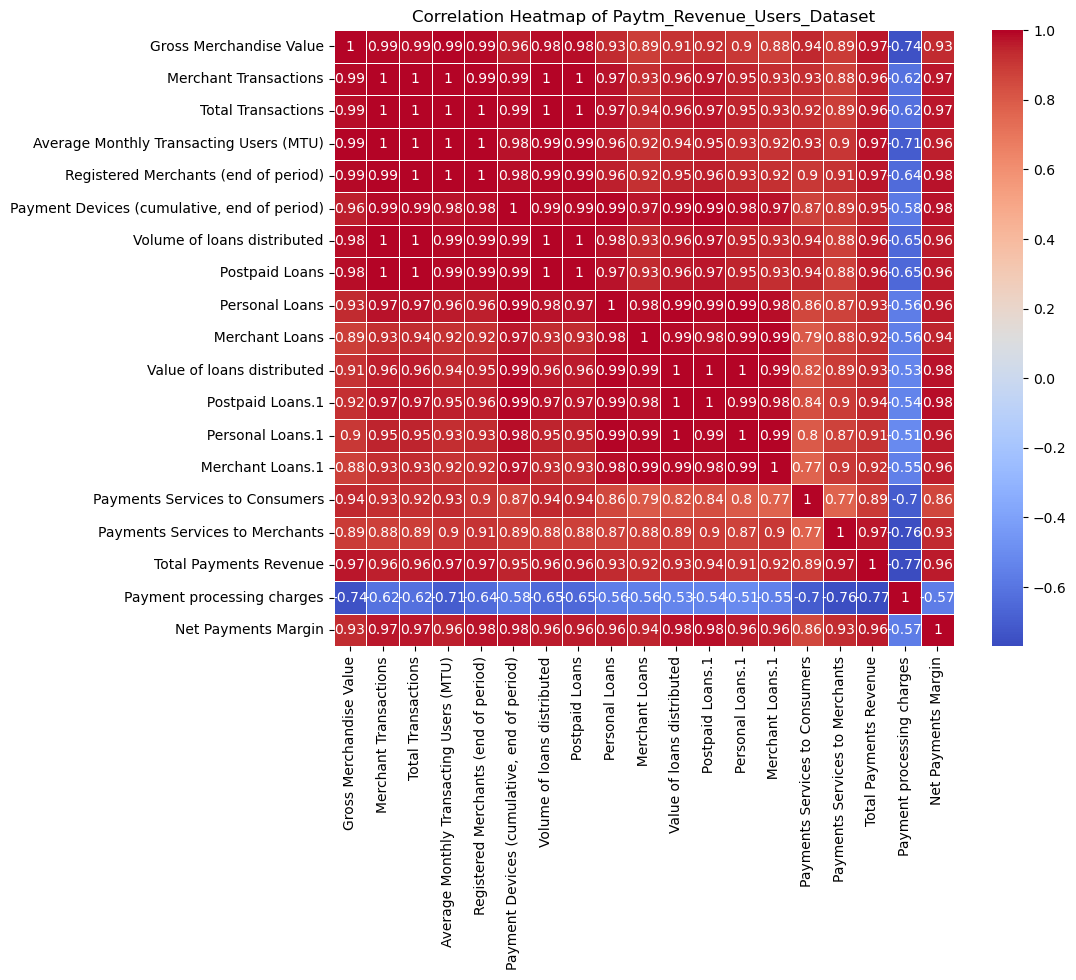

In [230]:
plt.figure(figsize=(10,8)) # Adjust the size of the figure
sns.heatmap(rel, annot=True, cmap='coolwarm', linewidths=0.5) # Customize the graph
plt.title('Correlation Heatmap of Paytm_Revenue_Users_Dataset') # Add a title
plt.show() # Display the graph


# Rupee Revenue in INR Crores

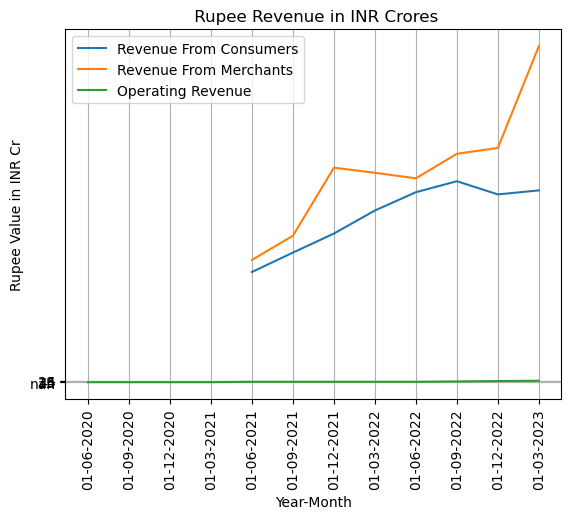

In [231]:
plt.plot(df['Date '],df['Payments Services to Consumers'],label='Revenue From Consumers')
plt.plot(df['Date '],df['Payments Services to Merchants'],label= 'Revenue From Merchants')
plt.plot(df['Date '],df['Other Operating Revenue'],label= 'Operating Revenue')
plt.title(' Rupee Revenue in INR Crores')
plt.xlabel('Year-Month')
plt.ylabel('Rupee Value in INR Cr')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

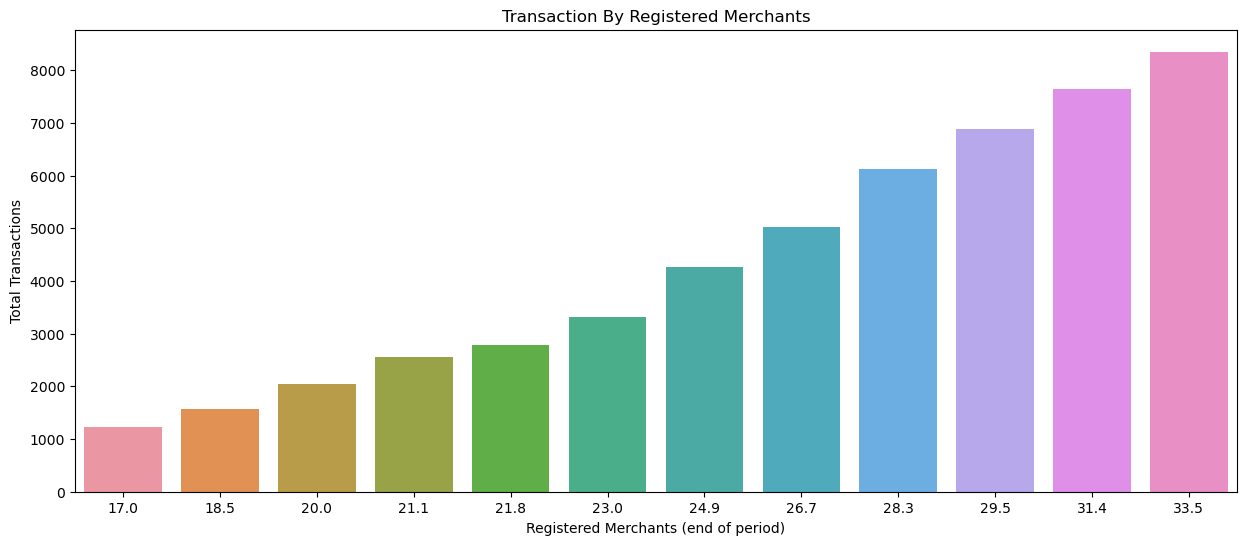

In [232]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Registered Merchants (end of period)'],y=df['Total Transactions'])
plt.title("Transaction By Registered Merchants")
plt.show()

# Monthly Transaction By Users

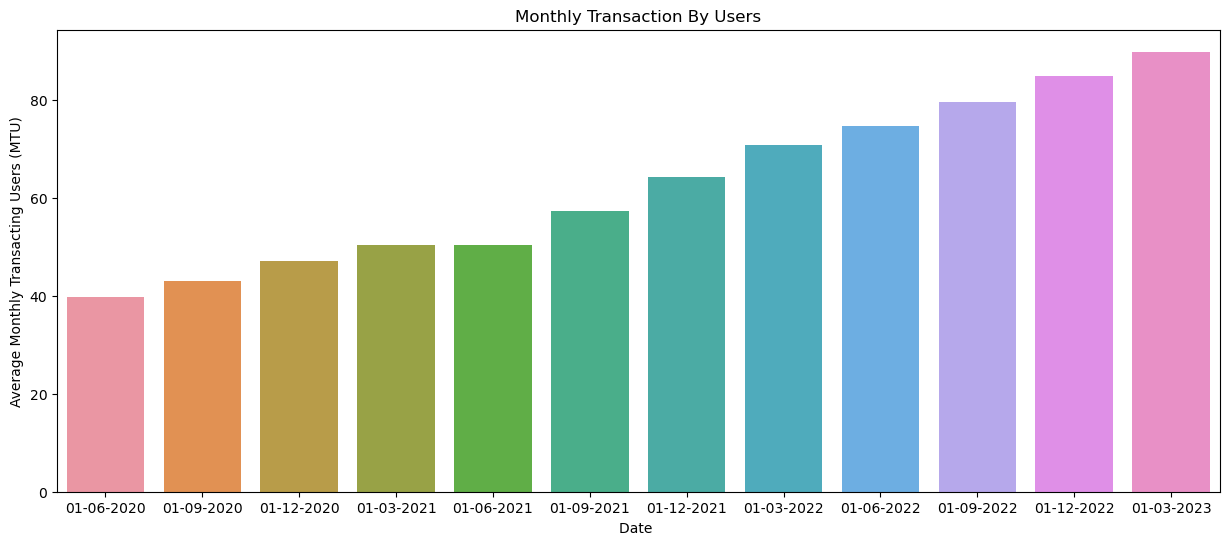

In [233]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Date '],y=df['Average Monthly Transacting Users (MTU)'])
plt.title("Monthly Transaction By Users")
plt.show()

Payment revenue Peroidically

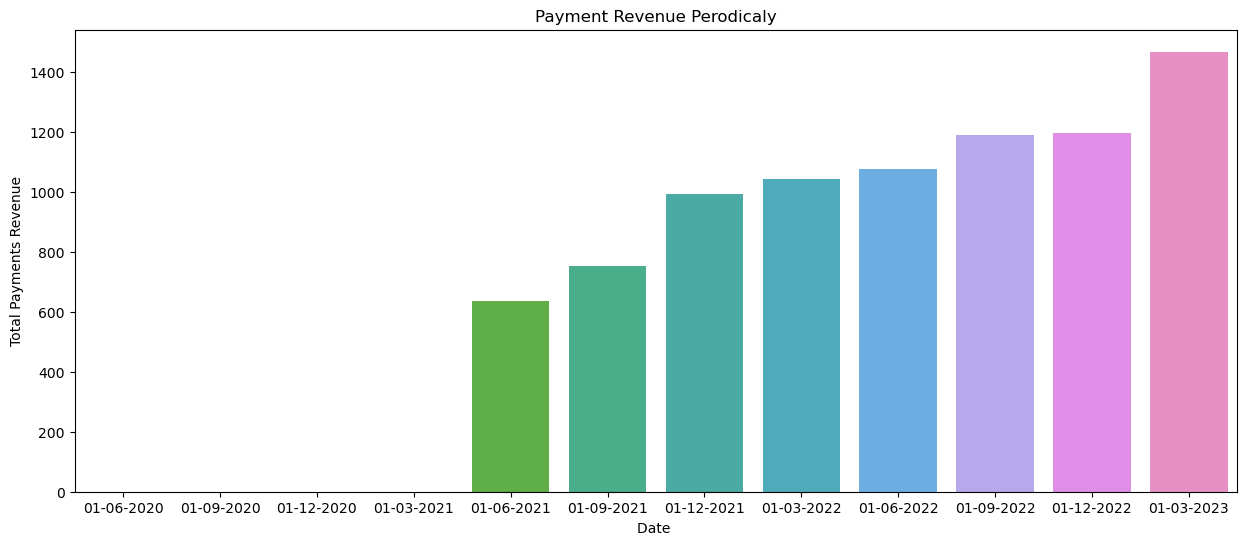

In [234]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Date '],y=df['Total Payments Revenue'])
plt.title("Payment Revenue Perodicaly")
plt.show()

# Average Monthly Transacting By Registered Merchants

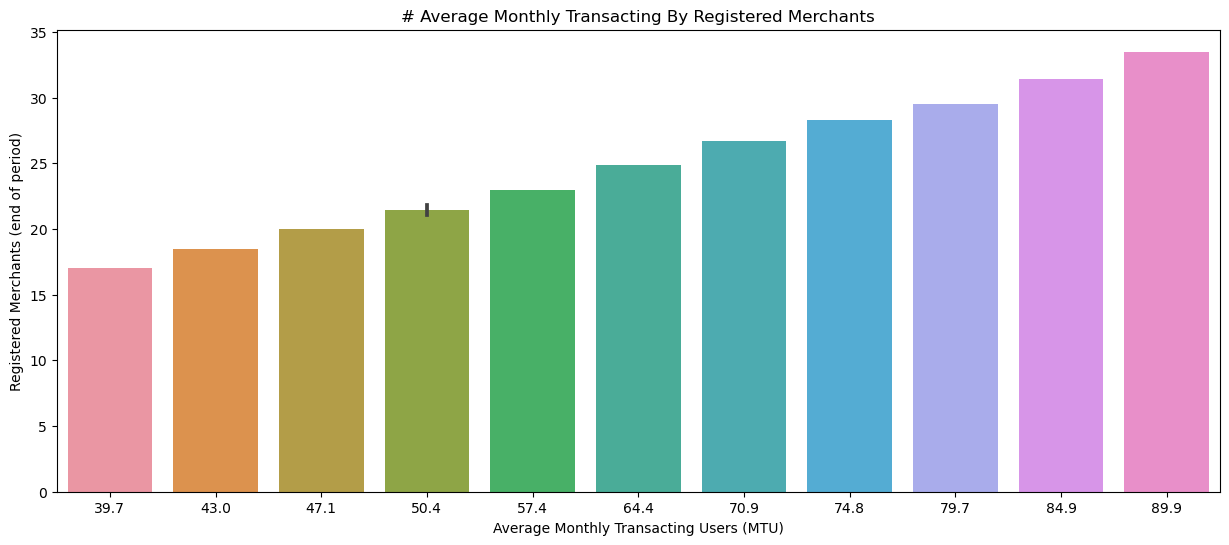

In [235]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Average Monthly Transacting Users (MTU)'],y=df['Registered Merchants (end of period)'])
plt.title("# Average Monthly Transacting By Registered Merchants")
plt.show()

# Payment Devices (cumulative, end of period) periodically

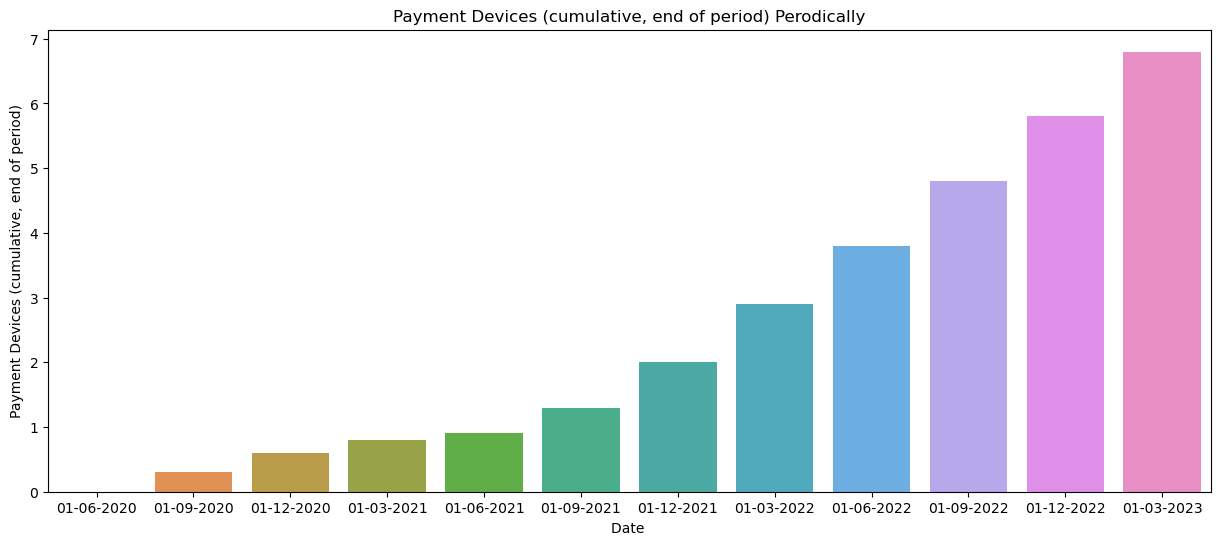

In [236]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Date '],y=df['Payment Devices (cumulative, end of period)'])
plt.title("Payment Devices (cumulative, end of period) Perodically")
plt.show()

# ****Loans

# Volume of Loan distributed to registered merchants

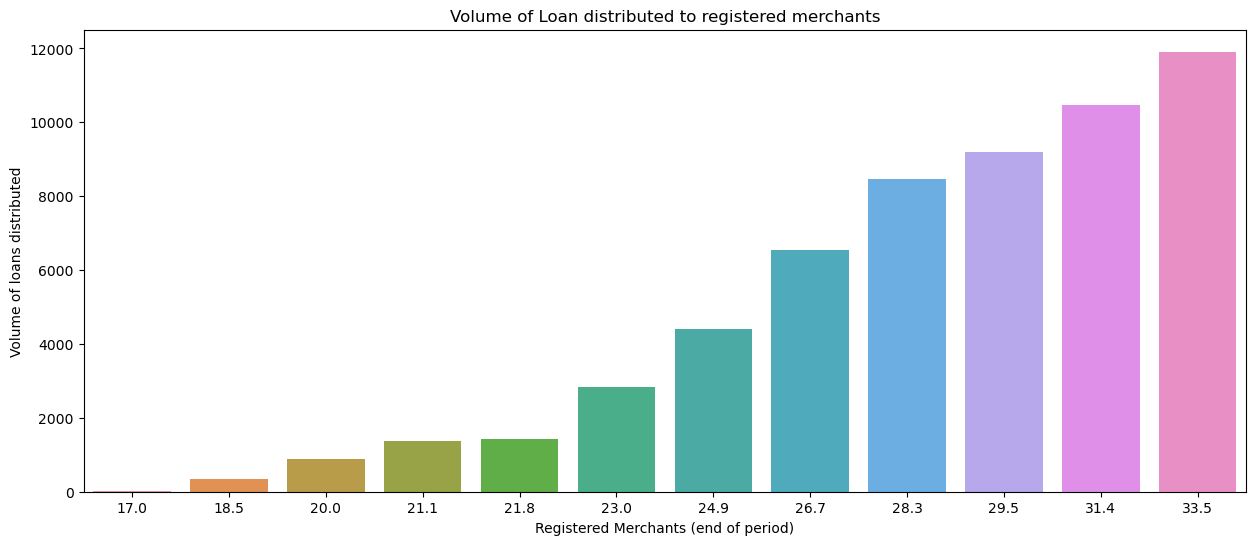

In [237]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Registered Merchants (end of period)'],y=df['Volume of loans distributed'])
plt.title("Volume of Loan distributed to registered merchants")
plt.show()

# "Volume of Loan distributed Perodically"

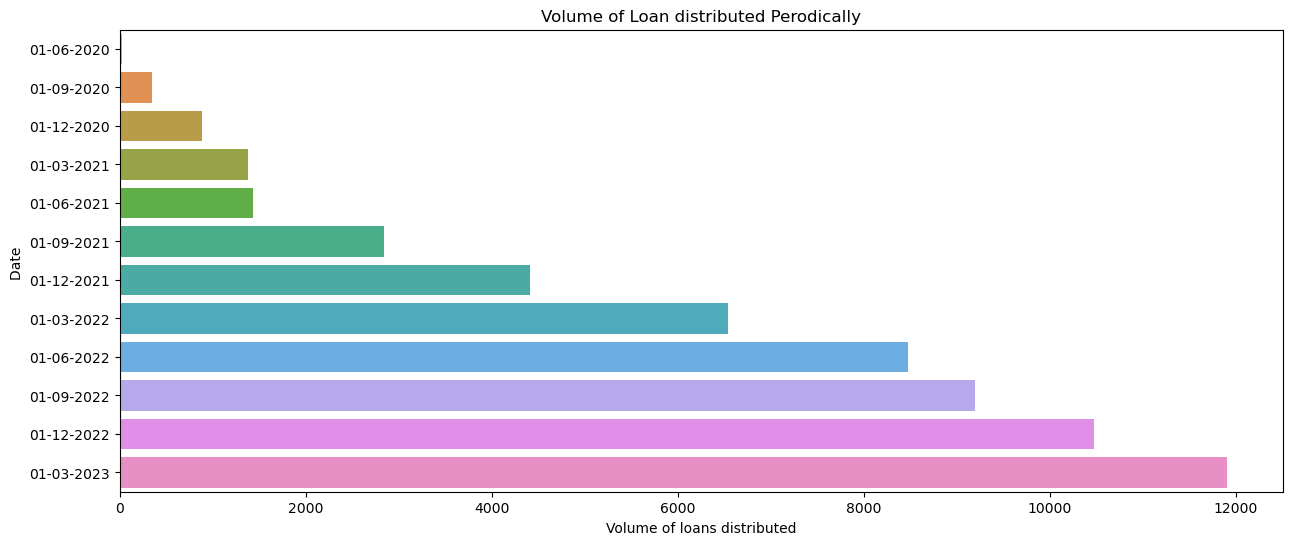

In [238]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Volume of loans distributed'],y=df['Date '])
plt.title("Volume of Loan distributed Perodically")
plt.show()

# Periodwise distribution of loans

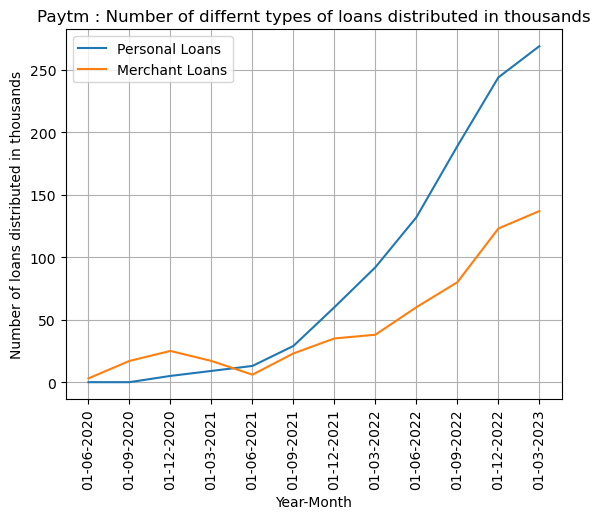

In [239]:
plt.plot(df['Date '],df['  Personal Loans'],label= 'Personal Loans')
plt.plot(df['Date '],df['  Merchant Loans'],label= 'Merchant Loans')
plt.title('Paytm : Number of differnt types of loans distributed in thousands')
plt.xlabel('Year-Month')
plt.ylabel('Number of loans distributed in thousands')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Volume of loan distributed

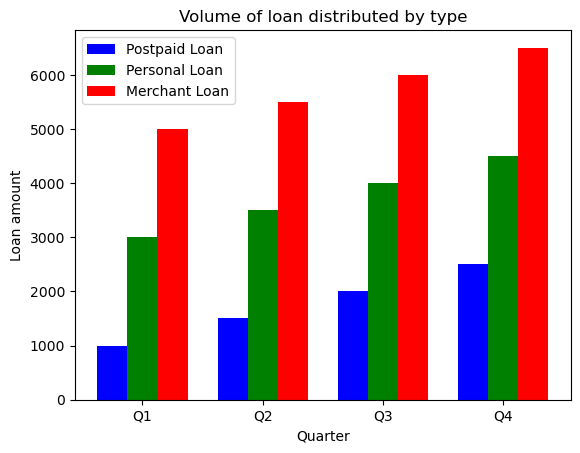

In [240]:
#sample dataframe
df = pd.DataFrame({
    'Postpaid Loan': [1000, 1500, 2000, 2500],
    'Personal Loan': [3000, 3500, 4000, 4500],
    'Merchant Loan': [5000, 5500, 6000, 6500]
})


# Set the x positions for each column
x1 = [1, 2, 3, 4]
x2 = [1.25, 2.25, 3.25, 4.25]
x3 = [1.5, 2.5, 3.5, 4.5]
# Plot each column as a separate bar plot
plt.bar(x1, df['Postpaid Loan'], width=0.25, color='blue', label='Postpaid Loan')
plt.bar(x2, df['Personal Loan'], width=0.25, color='green', label='Personal Loan')
plt.bar(x3, df['Merchant Loan'], width=0.25, color='red', label='Merchant Loan')
plt.xticks([1.25, 2.25, 3.25, 4.25], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.title('Volume of loan distributed by type')
plt.xlabel('Quarter')
plt.ylabel('Loan amount')
# Display the plot
plt.show()
